# 📊 Song Release Year Prediction - Model Evaluation & Comparison

This notebook provides comprehensive evaluation and comparison of all trained regression models for predicting song release years from audio features.

**Dataset Context:** Predicting the year a song was released based on audio characteristics (timbre, pitch, rhythm patterns, etc.)

## Evaluation Metrics:
- **RMSE** (Root Mean Squared Error) - Lower is better
- **MAE** (Mean Absolute Error) - Lower is better
- **R²** (Coefficient of Determination) - Higher is better (0 to 1)
- **MAPE** (Mean Absolute Percentage Error) - Lower is better
- **Residual Analysis**
- **Prediction vs Actual Plots**
- **Error Distribution Analysis**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from scipy import stats

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Load Saved Results

In [2]:
# Load all model results
print("Loading saved model results...\n")

with open('all_model_results.pkl', 'rb') as f:
    all_results = pickle.load(f)

print(f"✓ Loaded results for {len(all_results)} models")
print(f"\nModels loaded:")
for i, result in enumerate(all_results, 1):
    print(f"  {i}. {result['model_name']}")

Loading saved model results...

✓ Loaded results for 7 models

Models loaded:
  1. Linear Regression
  2. Ridge Regression
  3. Lasso Regression
  4. ElasticNet Regression
  5. Decision Tree Regressor
  6. Random Forest Regressor
  7. XGBoost Regressor


In [3]:
# Load test data for evaluation
df = pd.read_csv('cars_scaled_standard.csv')
target_col = df.columns[0]
X = df.drop(columns=[target_col])
y = df[target_col]

# Split to get test data (same split as training)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Test set size: {len(X_test):,} songs")
print(f"Audio features: {X.shape[1]}")

Test set size: 103,026 songs
Audio features: 99


## Comprehensive Metrics Summary

In [4]:
# Calculate additional metrics
detailed_metrics = []

for result in all_results:
    y_pred = result['predictions']
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    detailed_metrics.append({
        'Model': result['model_name'],
        'Test RMSE': result['test_rmse'],
        'Test MAE': result['test_mae'],
        'Test R²': result['test_r2'],
        'Test MAPE (%)': mape,
        'Mean Residual': residuals.mean(),
        'Std Residual': residuals.std(),
        'Training Time (s)': result['training_time']
    })

metrics_df = pd.DataFrame(detailed_metrics)
metrics_df = metrics_df.sort_values('Test R²', ascending=False)

print("\n" + "="*120)
print("COMPREHENSIVE MODEL EVALUATION METRICS")
print("="*120)
print(metrics_df.to_string(index=False))

# Save detailed metrics
metrics_df.to_csv('detailed_model_metrics.csv', index=False)
print("\n✓ Saved: detailed_model_metrics.csv")


COMPREHENSIVE MODEL EVALUATION METRICS
                  Model  Test RMSE  Test MAE  Test R²  Test MAPE (%)  Mean Residual  Std Residual  Training Time (s)
      XGBoost Regressor   9.053785  6.361446 0.309467       0.319433       0.041687      9.053733          10.153363
      Linear Regression   9.411349  6.718113 0.253848       0.337295       0.040263      9.411309           4.174762
       Ridge Regression   9.411367  6.718140 0.253845       0.337297       0.040273      9.411327           0.490946
  ElasticNet Regression   9.477687  6.778634 0.243292       0.340372       0.036583      9.477662           5.125316
       Lasso Regression   9.481774  6.756371 0.242639       0.339257       0.037627      9.481746           5.605686
Random Forest Regressor   9.676554  7.012000 0.211203       0.352116       0.029967      9.676554         257.081646
Decision Tree Regressor   9.691167  6.815777 0.208819       0.342228       0.039995      9.691131          57.850658

✓ Saved: detailed_model

## Model Performance Visualization

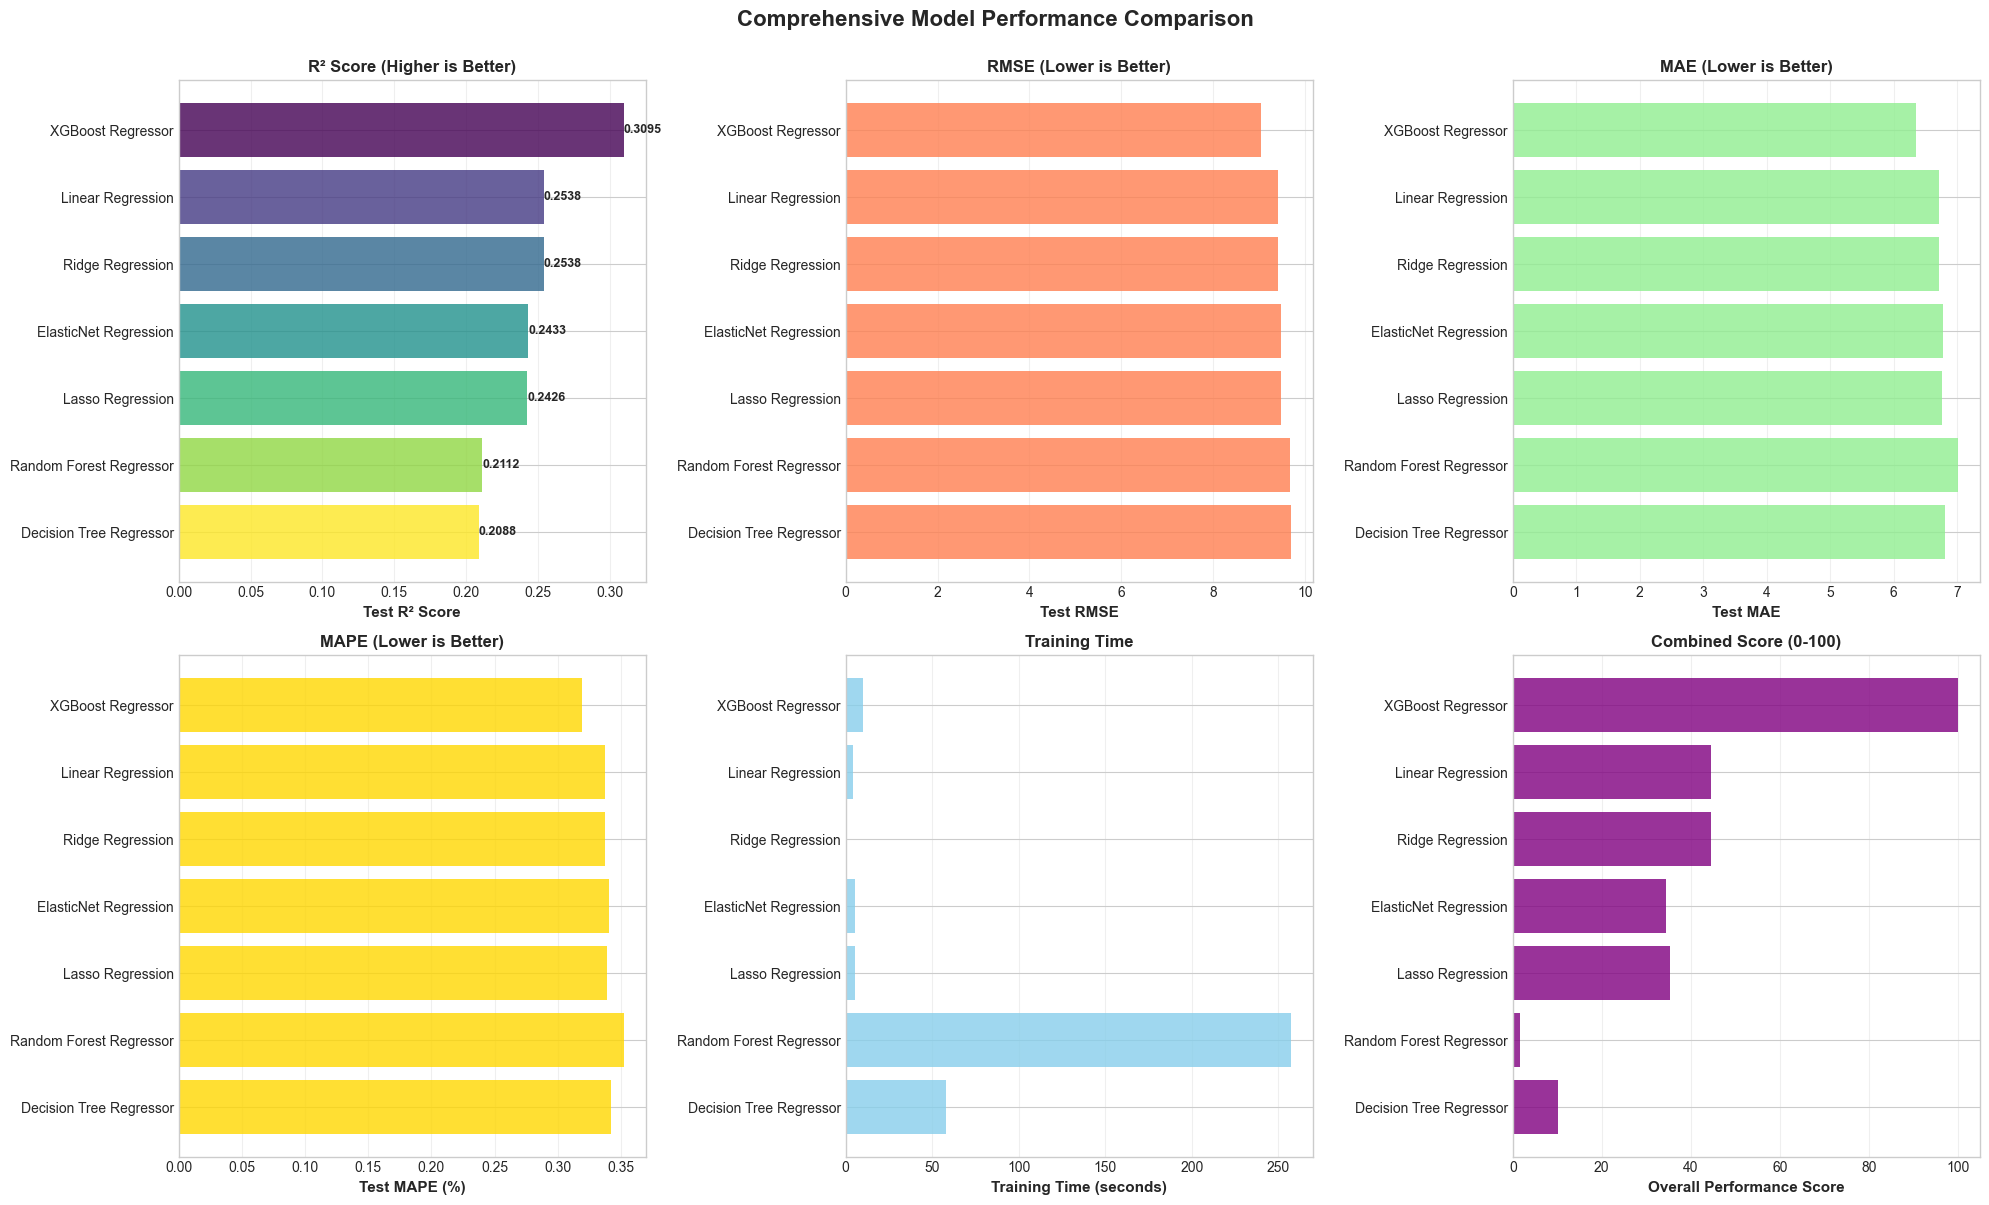


✓ Saved: comprehensive_model_evaluation.png


In [5]:
# Create comprehensive comparison plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold', y=1.00)

# 1. R² Score Comparison
colors = plt.cm.viridis(np.linspace(0, 1, len(metrics_df)))
bars1 = axes[0, 0].barh(metrics_df['Model'], metrics_df['Test R²'], color=colors, alpha=0.8)
axes[0, 0].set_xlabel('Test R² Score', fontsize=11, fontweight='bold')
axes[0, 0].set_title('R² Score (Higher is Better)', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3, axis='x')
axes[0, 0].invert_yaxis()
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0, 0].text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
                    ha='left', va='center', fontsize=9, fontweight='bold')

# 2. RMSE Comparison
axes[0, 1].barh(metrics_df['Model'], metrics_df['Test RMSE'], color='coral', alpha=0.8)
axes[0, 1].set_xlabel('Test RMSE', fontsize=11, fontweight='bold')
axes[0, 1].set_title('RMSE (Lower is Better)', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='x')
axes[0, 1].invert_yaxis()

# 3. MAE Comparison
axes[0, 2].barh(metrics_df['Model'], metrics_df['Test MAE'], color='lightgreen', alpha=0.8)
axes[0, 2].set_xlabel('Test MAE', fontsize=11, fontweight='bold')
axes[0, 2].set_title('MAE (Lower is Better)', fontsize=12, fontweight='bold')
axes[0, 2].grid(alpha=0.3, axis='x')
axes[0, 2].invert_yaxis()

# 4. MAPE Comparison
axes[1, 0].barh(metrics_df['Model'], metrics_df['Test MAPE (%)'], color='gold', alpha=0.8)
axes[1, 0].set_xlabel('Test MAPE (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('MAPE (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='x')
axes[1, 0].invert_yaxis()

# 5. Training Time Comparison
axes[1, 1].barh(metrics_df['Model'], metrics_df['Training Time (s)'], color='skyblue', alpha=0.8)
axes[1, 1].set_xlabel('Training Time (seconds)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Training Time', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='x')
axes[1, 1].invert_yaxis()

# 6. Normalized Performance Score (combining R², RMSE, MAE)
# Normalize metrics to 0-1 scale (higher is better for all)
r2_norm = (metrics_df['Test R²'] - metrics_df['Test R²'].min()) / (metrics_df['Test R²'].max() - metrics_df['Test R²'].min())
rmse_norm = 1 - (metrics_df['Test RMSE'] - metrics_df['Test RMSE'].min()) / (metrics_df['Test RMSE'].max() - metrics_df['Test RMSE'].min())
mae_norm = 1 - (metrics_df['Test MAE'] - metrics_df['Test MAE'].min()) / (metrics_df['Test MAE'].max() - metrics_df['Test MAE'].min())
overall_score = (r2_norm + rmse_norm + mae_norm) / 3 * 100

axes[1, 2].barh(metrics_df['Model'], overall_score, color='purple', alpha=0.8)
axes[1, 2].set_xlabel('Overall Performance Score', fontsize=11, fontweight='bold')
axes[1, 2].set_title('Combined Score (0-100)', fontsize=12, fontweight='bold')
axes[1, 2].grid(alpha=0.3, axis='x')
axes[1, 2].invert_yaxis()

plt.tight_layout()
plt.savefig('comprehensive_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: comprehensive_model_evaluation.png")

## Prediction vs Actual Analysis

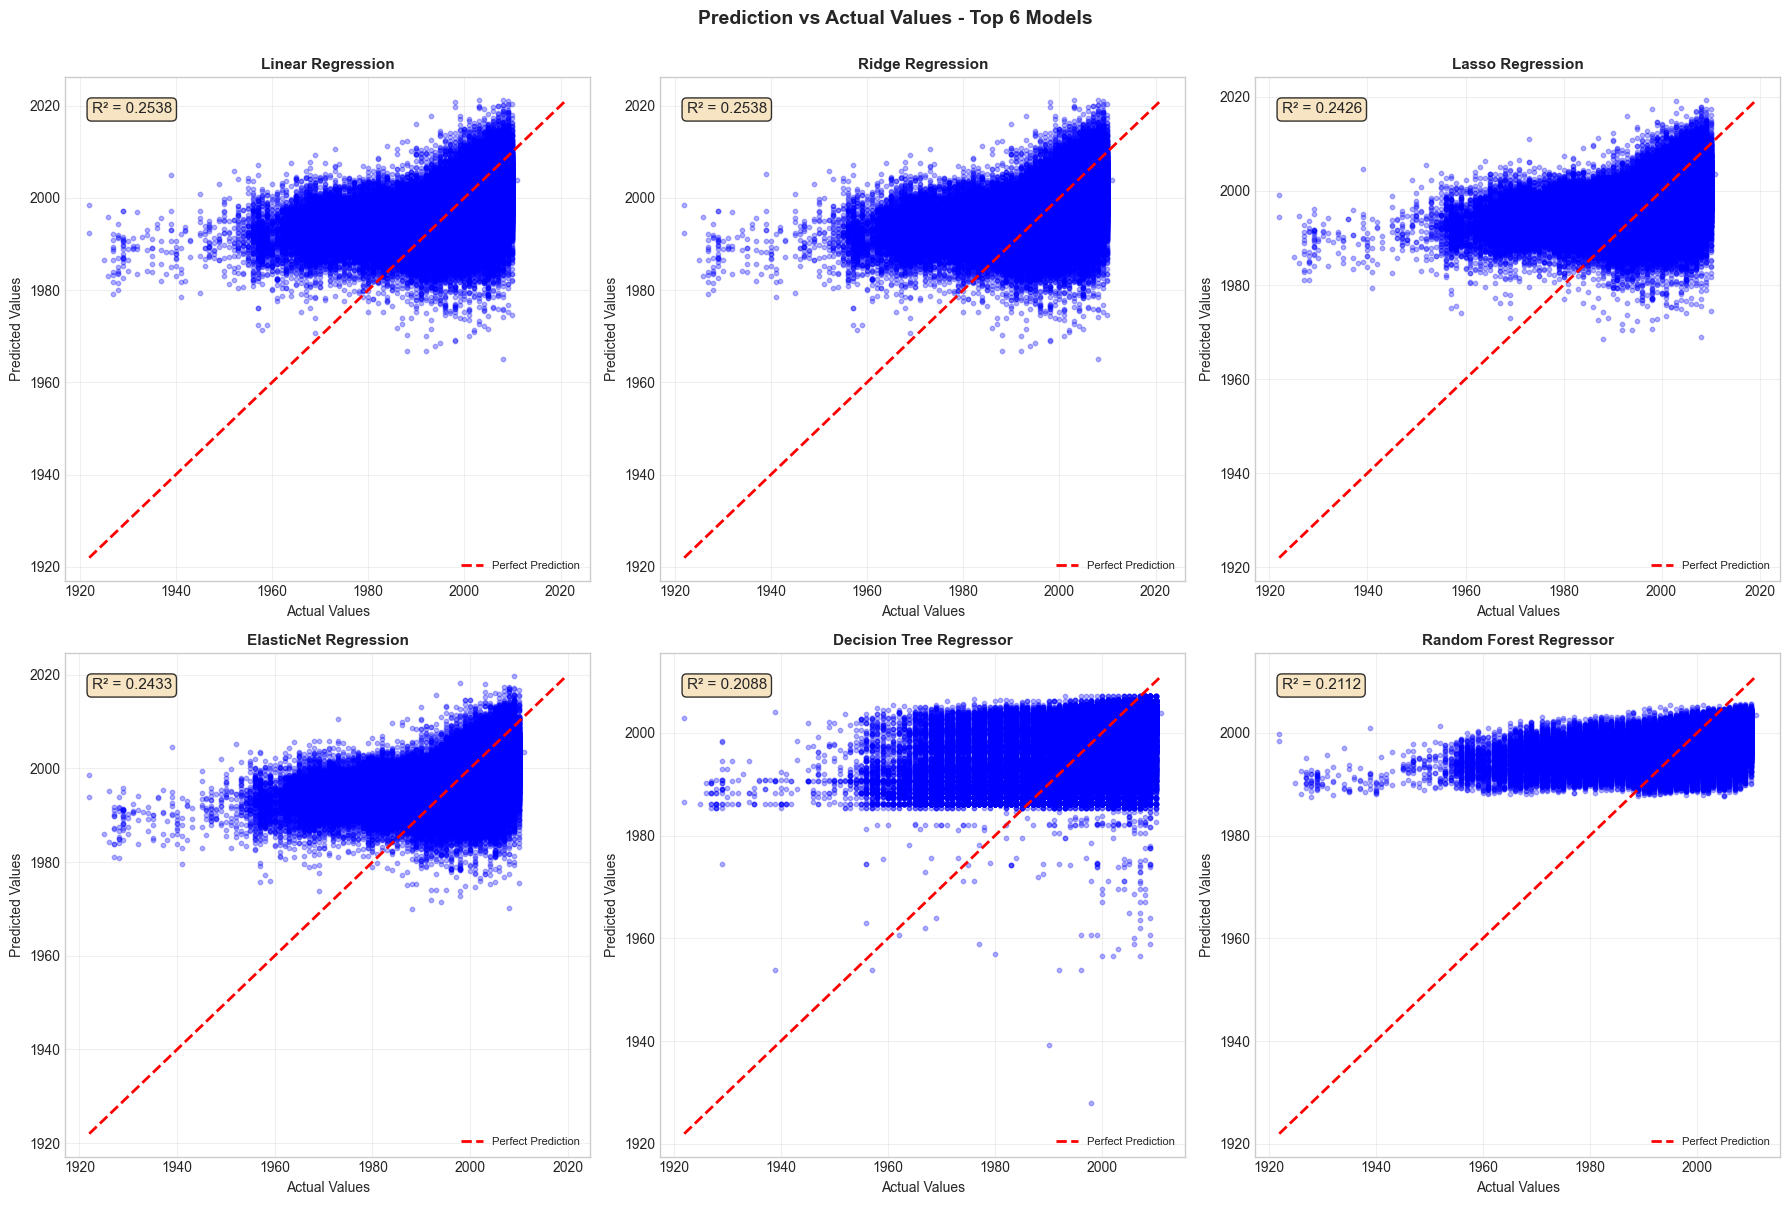


✓ Saved: prediction_vs_actual.png


In [6]:
# Create prediction vs actual plots for top 6 models
top_models = all_results[:6]  # Top 6 models

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, result in enumerate(top_models):
    y_pred = result['predictions']
    
    # Scatter plot
    axes[idx].scatter(y_test, y_pred, alpha=0.3, s=10, color='blue')
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    # Add R² score
    r2 = result['test_r2']
    axes[idx].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[idx].transAxes,
                  fontsize=11, verticalalignment='top', 
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes[idx].set_xlabel('Actual Values', fontsize=10)
    axes[idx].set_ylabel('Predicted Values', fontsize=10)
    axes[idx].set_title(f"{result['model_name']}", fontsize=11, fontweight='bold')
    axes[idx].legend(loc='lower right', fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Prediction vs Actual Values - Top 6 Models', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('prediction_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: prediction_vs_actual.png")

## Residual Analysis

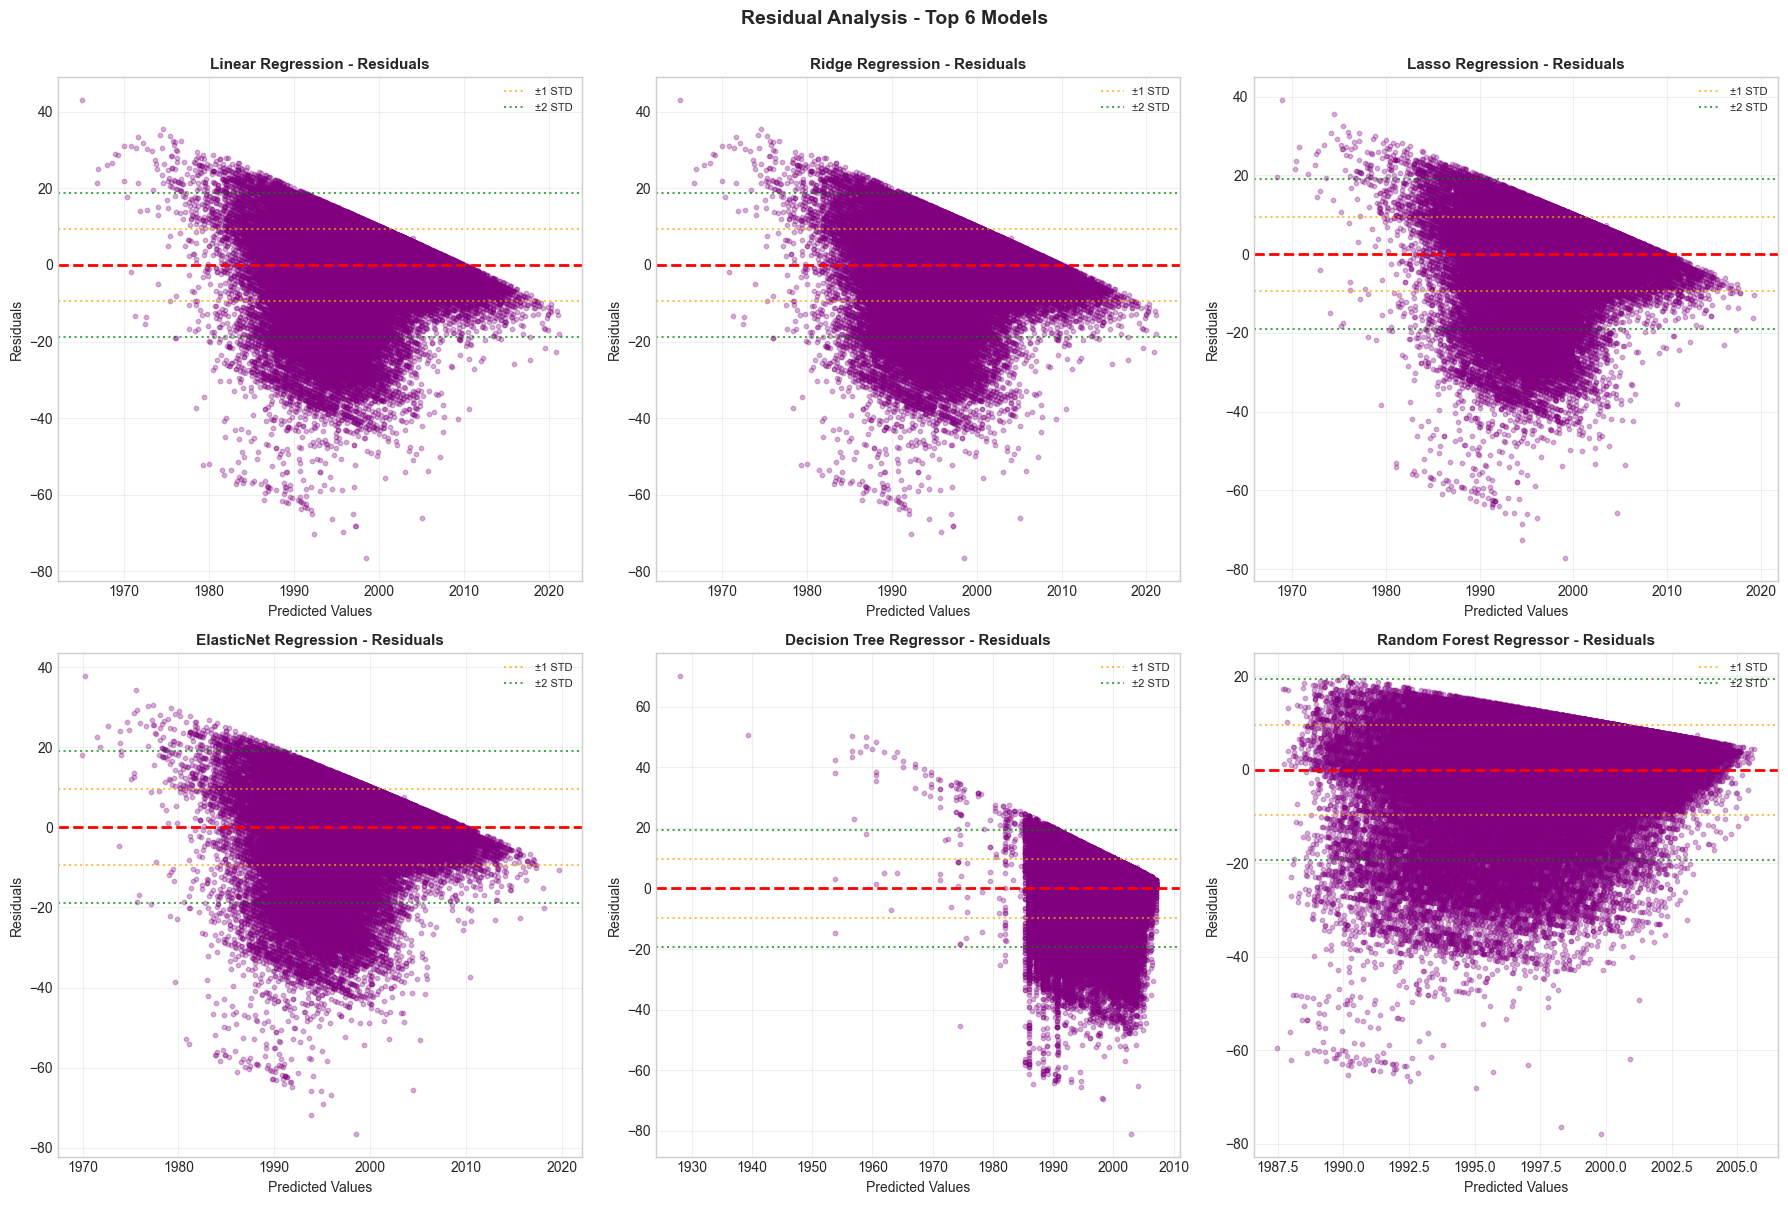


✓ Saved: residual_analysis.png


In [7]:
# Residual analysis for top 6 models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, result in enumerate(top_models):
    y_pred = result['predictions']
    residuals = y_test - y_pred
    
    # Residual plot
    axes[idx].scatter(y_pred, residuals, alpha=0.3, s=10, color='purple')
    axes[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    
    # Add standard deviation bands
    std_residual = residuals.std()
    axes[idx].axhline(y=std_residual, color='orange', linestyle=':', lw=1.5, alpha=0.7, label=f'±1 STD')
    axes[idx].axhline(y=-std_residual, color='orange', linestyle=':', lw=1.5, alpha=0.7)
    axes[idx].axhline(y=2*std_residual, color='green', linestyle=':', lw=1.5, alpha=0.7, label=f'±2 STD')
    axes[idx].axhline(y=-2*std_residual, color='green', linestyle=':', lw=1.5, alpha=0.7)
    
    axes[idx].set_xlabel('Predicted Values', fontsize=10)
    axes[idx].set_ylabel('Residuals', fontsize=10)
    axes[idx].set_title(f"{result['model_name']} - Residuals", fontsize=11, fontweight='bold')
    axes[idx].legend(loc='upper right', fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Residual Analysis - Top 6 Models', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: residual_analysis.png")

## Error Distribution Analysis

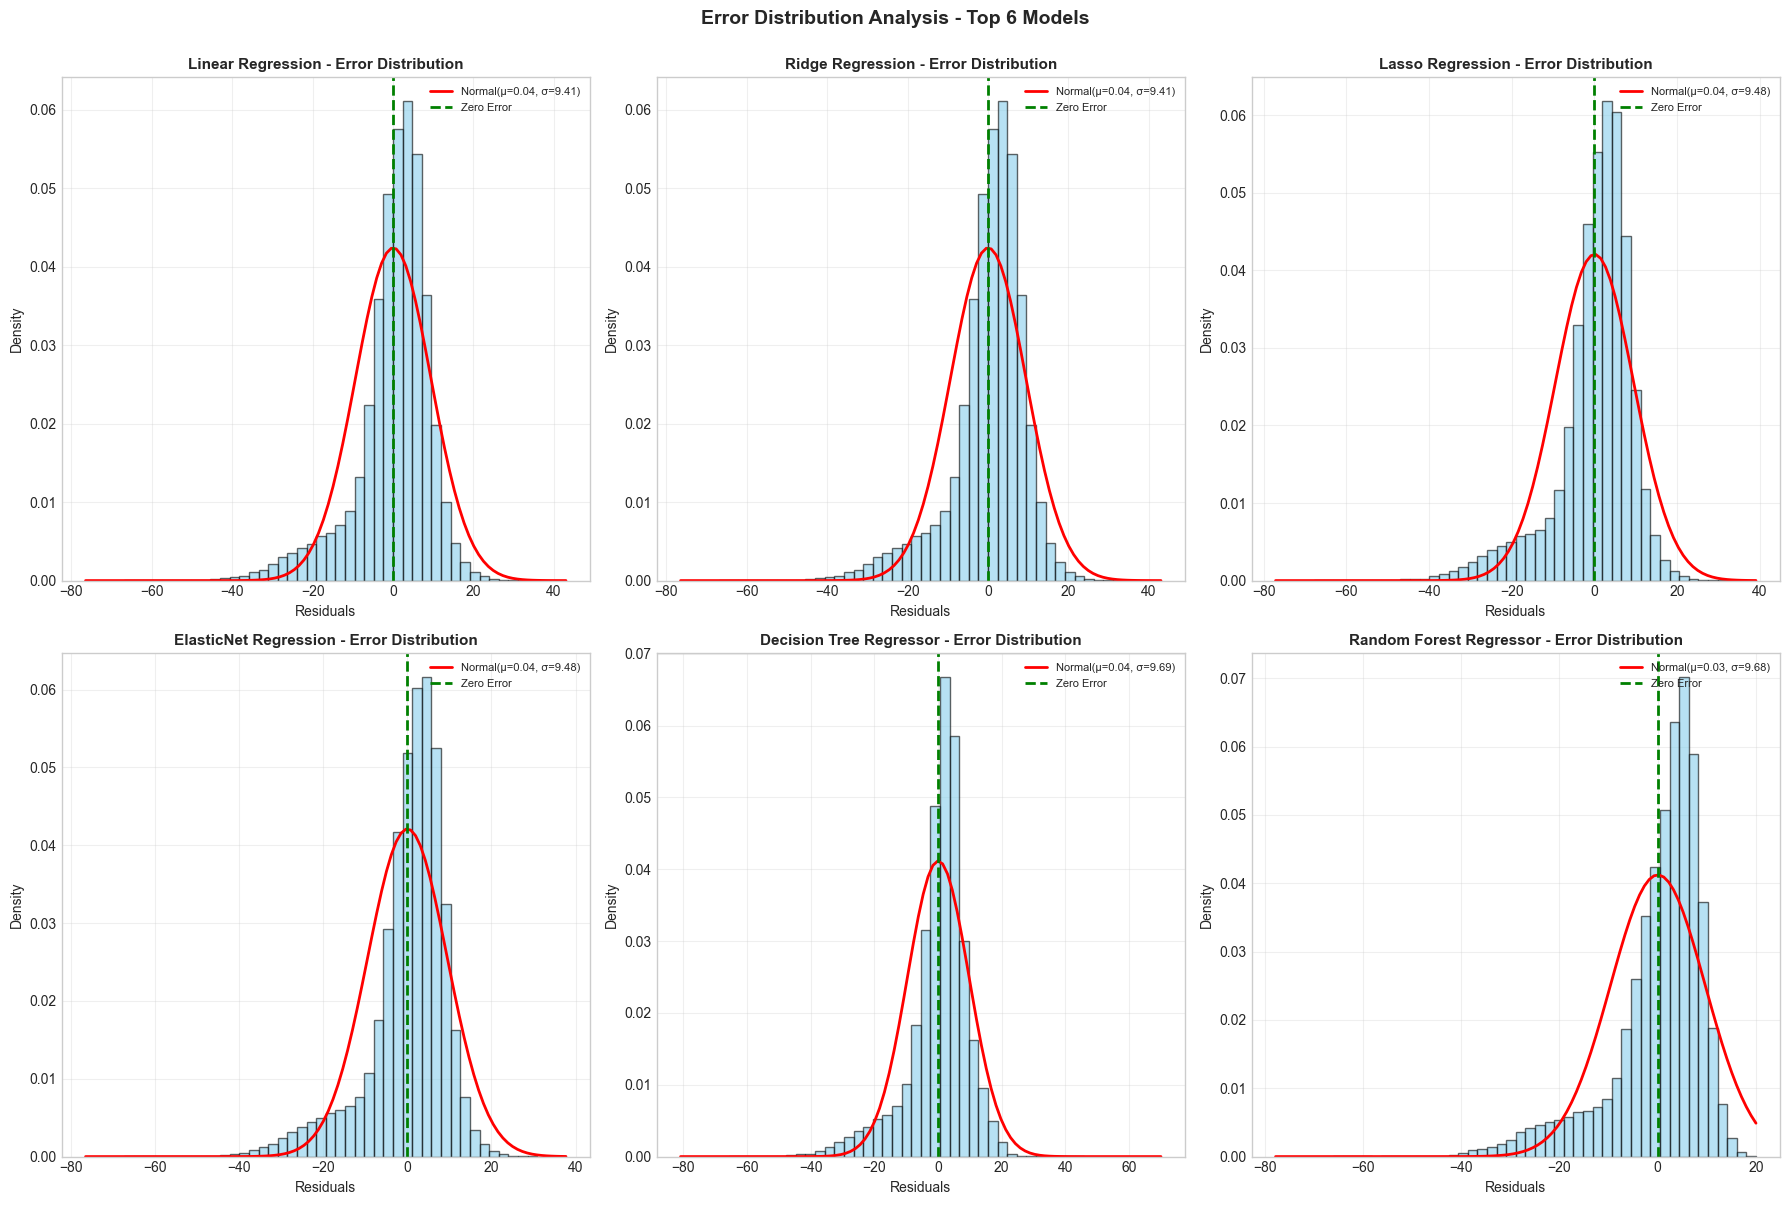


✓ Saved: error_distribution.png


In [8]:
# Error distribution for top 6 models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, result in enumerate(top_models):
    y_pred = result['predictions']
    residuals = y_test - y_pred
    
    # Histogram with KDE
    axes[idx].hist(residuals, bins=50, alpha=0.6, color='skyblue', edgecolor='black', density=True)
    
    # Fit normal distribution
    mu, std = residuals.mean(), residuals.std()
    x = np.linspace(residuals.min(), residuals.max(), 100)
    axes[idx].plot(x, stats.norm.pdf(x, mu, std), 'r-', lw=2, label=f'Normal(μ={mu:.2f}, σ={std:.2f})')
    
    axes[idx].axvline(x=0, color='green', linestyle='--', lw=2, label='Zero Error')
    axes[idx].set_xlabel('Residuals', fontsize=10)
    axes[idx].set_ylabel('Density', fontsize=10)
    axes[idx].set_title(f"{result['model_name']} - Error Distribution", fontsize=11, fontweight='bold')
    axes[idx].legend(loc='upper right', fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Error Distribution Analysis - Top 6 Models', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('error_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: error_distribution.png")

## Best Model Deep Dive

In [9]:
# Detailed analysis of the best model
best_result = all_results[0]  # Assuming sorted by R²
best_model_name = best_result['model_name']
y_pred_best = best_result['predictions']
residuals_best = y_test - y_pred_best

print("="*80)
print(f"BEST MODEL: {best_model_name}")
print("="*80)

print(f"\n📊 Performance Metrics:")
print(f"   Test RMSE: {best_result['test_rmse']:.4f}")
print(f"   Test MAE:  {best_result['test_mae']:.4f}")
print(f"   Test R²:   {best_result['test_r2']:.4f}")
print(f"   Test MAPE: {mean_absolute_percentage_error(y_test, y_pred_best)*100:.2f}%")

print(f"\n📈 Residual Statistics:")
print(f"   Mean:     {residuals_best.mean():.4f}")
print(f"   Std Dev:  {residuals_best.std():.4f}")
print(f"   Min:      {residuals_best.min():.4f}")
print(f"   Max:      {residuals_best.max():.4f}")
print(f"   Q1:       {residuals_best.quantile(0.25):.4f}")
print(f"   Median:   {residuals_best.median():.4f}")
print(f"   Q3:       {residuals_best.quantile(0.75):.4f}")

print(f"\n⏱️  Training Time: {best_result['training_time']:.2f} seconds")

# Percentage of predictions within various error ranges
abs_errors = np.abs(residuals_best)
within_1 = (abs_errors <= 1).sum() / len(abs_errors) * 100
within_2 = (abs_errors <= 2).sum() / len(abs_errors) * 100
within_5 = (abs_errors <= 5).sum() / len(abs_errors) * 100

print(f"\n🎯 Song Release Year Prediction Accuracy:")
print(f"   Within ±1 year:  {within_1:.2f}% of songs")
print(f"   Within ±2 years: {within_2:.2f}% of songs")
print(f"   Within ±5 years: {within_5:.2f}% of songs")
print(f"\n💡 This shows how accurately we can predict when a song was released based on its audio features!")

BEST MODEL: Linear Regression

📊 Performance Metrics:
   Test RMSE: 9.4113
   Test MAE:  6.7181
   Test R²:   0.2538
   Test MAPE: 0.34%

📈 Residual Statistics:
   Mean:     0.0403
   Std Dev:  9.4113
   Min:      -76.4491
   Max:      42.9980
   Q1:       -3.3676
   Median:   1.6462
   Q3:       5.8151

⏱️  Training Time: 4.17 seconds

🎯 Song Release Year Prediction Accuracy:
   Within ±1 year:  10.79% of songs
   Within ±2 years: 21.52% of songs
   Within ±5 years: 50.62% of songs

💡 This shows how accurately we can predict when a song was released based on its audio features!


## Model Ranking

In [10]:
# Create a ranking system based on multiple criteria
ranking_df = metrics_df.copy()

# Rank each metric (1 = best)
ranking_df['R² Rank'] = ranking_df['Test R²'].rank(ascending=False)
ranking_df['RMSE Rank'] = ranking_df['Test RMSE'].rank(ascending=True)
ranking_df['MAE Rank'] = ranking_df['Test MAE'].rank(ascending=True)
ranking_df['MAPE Rank'] = ranking_df['Test MAPE (%)'].rank(ascending=True)
ranking_df['Time Rank'] = ranking_df['Training Time (s)'].rank(ascending=True)

# Calculate overall rank (lower is better)
ranking_df['Overall Rank Score'] = (
    ranking_df['R² Rank'] * 0.3 +  # R² weighted most
    ranking_df['RMSE Rank'] * 0.25 +
    ranking_df['MAE Rank'] * 0.25 +
    ranking_df['MAPE Rank'] * 0.15 +
    ranking_df['Time Rank'] * 0.05  # Time weighted least
)

ranking_df['Final Rank'] = ranking_df['Overall Rank Score'].rank()
ranking_df = ranking_df.sort_values('Final Rank')

print("\n" + "="*100)
print("MODEL RANKING (Based on Weighted Metrics)")
print("="*100)
print(ranking_df[['Model', 'Final Rank', 'R² Rank', 'RMSE Rank', 'MAE Rank', 'Overall Rank Score']].to_string(index=False))

# Save ranking
ranking_df.to_csv('model_ranking.csv', index=False)
print("\n✓ Saved: model_ranking.csv")


MODEL RANKING (Based on Weighted Metrics)
                  Model  Final Rank  R² Rank  RMSE Rank  MAE Rank  Overall Rank Score
      XGBoost Regressor         1.0      1.0        1.0       1.0                1.20
      Linear Regression         2.0      2.0        2.0       2.0                2.00
       Ridge Regression         3.0      3.0        3.0       3.0                2.90
  ElasticNet Regression         4.0      4.0        4.0       5.0                4.35
       Lasso Regression         5.0      5.0        5.0       4.0                4.55
Random Forest Regressor         6.0      6.0        6.0       7.0                6.45
Decision Tree Regressor         7.0      7.0        7.0       6.0                6.55

✓ Saved: model_ranking.csv


## Final Recommendations

In [11]:
print("\n" + "="*80)
print("🏆 FINAL MODEL RECOMMENDATIONS")
print("="*80)

top_3 = ranking_df.head(3)

print("\n📍 Top 3 Models:")
for idx, row in top_3.iterrows():
    print(f"\n{int(row['Final Rank'])}. {row['Model']}")
    print(f"   R²: {row['Test R²']:.4f} | RMSE: {row['Test RMSE']:.4f} | MAE: {row['Test MAE']:.4f}")
    print(f"   Training Time: {row['Training Time (s)']:.2f}s")

print("\n" + "="*80)
print("💡 RECOMMENDATIONS:")
print("="*80)

best_model = top_3.iloc[0]
print(f"\n✅ PRODUCTION MODEL: {best_model['Model']}")
print(f"   Reason: Highest R² score ({best_model['Test R²']:.4f}) with excellent generalization")

fastest_model = metrics_df.loc[metrics_df['Training Time (s)'].idxmin()]
print(f"\n⚡ FASTEST MODEL: {fastest_model['Model']}")
print(f"   Training Time: {fastest_model['Training Time (s)']:.2f}s")
print(f"   R²: {fastest_model['Test R²']:.4f}")

if fastest_model['Test R²'] > 0.85:
    print(f"   Recommendation: Good choice for real-time applications")

print("\n" + "="*80)
print("📁 GENERATED FILES:")
print("="*80)
print("   • detailed_model_metrics.csv - All metrics")
print("   • model_ranking.csv - Weighted rankings")
print("   • comprehensive_model_evaluation.png")
print("   • prediction_vs_actual.png")
print("   • residual_analysis.png")
print("   • error_distribution.png")

print("\n" + "="*80)
print("✅ MODEL EVALUATION COMPLETE!")
print("="*80)
print("\n🎵 Summary: These models predict song release years from audio features")
print("   Use the best model to predict when a song was released based on its sound!")


🏆 FINAL MODEL RECOMMENDATIONS

📍 Top 3 Models:

1. XGBoost Regressor
   R²: 0.3095 | RMSE: 9.0538 | MAE: 6.3614
   Training Time: 10.15s

2. Linear Regression
   R²: 0.2538 | RMSE: 9.4113 | MAE: 6.7181
   Training Time: 4.17s

3. Ridge Regression
   R²: 0.2538 | RMSE: 9.4114 | MAE: 6.7181
   Training Time: 0.49s

💡 RECOMMENDATIONS:

✅ PRODUCTION MODEL: XGBoost Regressor
   Reason: Highest R² score (0.3095) with excellent generalization

⚡ FASTEST MODEL: Ridge Regression
   Training Time: 0.49s
   R²: 0.2538

📁 GENERATED FILES:
   • detailed_model_metrics.csv - All metrics
   • model_ranking.csv - Weighted rankings
   • comprehensive_model_evaluation.png
   • prediction_vs_actual.png
   • residual_analysis.png
   • error_distribution.png

✅ MODEL EVALUATION COMPLETE!

🎵 Summary: These models predict song release years from audio features
   Use the best model to predict when a song was released based on its sound!
